In [1]:
import pandas as pd
import numpy as np
import torch
import os
import sys
import matplotlib.pyplot as plt

sys.path.append('..')
from src.models.model import VSpyct
from src.utils import (calculate_bs, fix_predictions, plot_brier)
from src.data.dataset import SurvivalDataset
from src.eval import IPCWBrier

/Users/viktorandonovic/miniconda3/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = SurvivalDataset(fname='pbc.rda', path='../data/raw/')
print(data.dataset.head())
X_train, X_test, y_train, y_test = data.get_tensors()

   id  time  status trt        age sex ascites hepato spiders  edema  bili  \
0   1   400       2   1  58.765229   f       1      1       1    1.0  14.5   
1   2  4500       0   1  56.446270   f       0      1       1    0.0   1.1   
2   3  1012       2   1  70.072553   m       0      0       0    0.5   1.4   
3   4  1925       2   1  54.740589   f       0      1       1    0.5   1.8   
4   5  1504       1   2  38.105407   f       0      1       1    0.0   3.4   

  chol  albumin copper  alk.phos     ast trig platelet  protime stage  
0  261     2.60    156    1718.0  137.95  172      190     12.2     4  
1  302     4.14     54    7394.8  113.52   88      221     10.6     3  
2  176     3.48    210     516.0   96.10   55      151     12.0     4  
3  244     2.54     64    6121.8   60.63   92      183     10.3     4  
4  279     3.53    143     671.0  113.15   72      136     10.9     3  
4795
Succesfully created time tensor of shape: torch.Size([418, 4795])
(334, 769) torch.Size([334, 

In [3]:
model = VSpyct(max_depth=3, bs=64)
model.fit(X_train, y_train)

Total variance: 569.7177124023438
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   1%|          | 3/500 [00:00<01:04,  7.71it/s]

[iteration 0001] loss: 356913947852.8000
[iteration 0002] loss: 331178806579.2000
[iteration 0003] loss: 300996712652.8000


Epochs:   1%|          | 5/500 [00:00<00:51,  9.54it/s]

[iteration 0004] loss: 270459015372.8000
[iteration 0005] loss: 246510969548.8000
[iteration 0006] loss: 221818938572.8000


Epochs:   2%|▏         | 9/500 [00:00<00:45, 10.72it/s]

[iteration 0007] loss: 201771657523.2000
[iteration 0008] loss: 183665354572.8000
[iteration 0009] loss: 165526501427.2000


Epochs:   2%|▏         | 11/500 [00:01<00:44, 11.00it/s]

[iteration 0010] loss: 153065835372.8000
[iteration 0011] loss: 139756817600.0000
[iteration 0012] loss: 129025405683.2000


Epochs:   3%|▎         | 15/500 [00:01<00:45, 10.68it/s]

[iteration 0013] loss: 117097064638.4000
[iteration 0014] loss: 107352989777.6000
[iteration 0015] loss: 100864592527.2000


Epochs:   3%|▎         | 17/500 [00:01<00:44, 10.88it/s]

[iteration 0016] loss: 95504172814.4250
[iteration 0017] loss: 89050333068.3324
[iteration 0018] loss: 82764772463.3039


Epochs:   4%|▍         | 21/500 [00:01<00:39, 12.08it/s]

[iteration 0019] loss: 80694043154.4438
[iteration 0020] loss: 74751254524.0250
[iteration 0021] loss: 71575559165.4500


Epochs:   5%|▍         | 23/500 [00:02<00:38, 12.43it/s]

[iteration 0022] loss: 67700629334.3797
[iteration 0023] loss: 63274849850.3000
[iteration 0024] loss: 62021135500.1137


Epochs:   5%|▌         | 27/500 [00:02<00:39, 12.05it/s]

[iteration 0025] loss: 59055118288.0000
[iteration 0026] loss: 58234343601.0000
[iteration 0027] loss: 57817250153.1250


Epochs:   6%|▌         | 29/500 [00:02<00:38, 12.39it/s]

[iteration 0028] loss: 54316474656.3937
[iteration 0029] loss: 52688795033.5125
[iteration 0030] loss: 51929330487.4051


Epochs:   7%|▋         | 33/500 [00:02<00:36, 12.92it/s]

[iteration 0031] loss: 51097185962.5104
[iteration 0032] loss: 51108804019.7500
[iteration 0033] loss: 48832564534.4250


Epochs:   7%|▋         | 35/500 [00:03<00:35, 13.07it/s]

[iteration 0034] loss: 50834761140.0359
[iteration 0035] loss: 49633290023.4437
[iteration 0036] loss: 48249777856.0512


Epochs:   8%|▊         | 39/500 [00:03<00:34, 13.27it/s]

[iteration 0037] loss: 47007427686.1922
[iteration 0038] loss: 46640391437.5199
[iteration 0039] loss: 48576088752.4875


Epochs:   8%|▊         | 41/500 [00:03<00:34, 13.30it/s]

[iteration 0040] loss: 47241160055.6750
[iteration 0041] loss: 46184960604.6170
[iteration 0042] loss: 45976023138.7500


Epochs:   9%|▉         | 45/500 [00:03<00:34, 13.27it/s]

[iteration 0043] loss: 44847460176.7500
[iteration 0044] loss: 44536450075.7781
[iteration 0045] loss: 46058345996.7766


Epochs:   9%|▉         | 46/500 [00:03<00:39, 11.60it/s]


[iteration 0046] loss: 45619999084.2500
Early stopping at epoch 46.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)
Var left tensor(502.6512)
Var right tensor(594.1890)
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   0%|          | 0/500 [00:00<?, ?it/s]

[iteration 0001] loss: 72009538816.0000
[iteration 0002] loss: 70182566758.4000


Epochs:   1%|          | 6/500 [00:00<00:19, 24.97it/s]

[iteration 0003] loss: 62418521164.8000
[iteration 0004] loss: 57401209830.4000
[iteration 0005] loss: 54849855424.0000
[iteration 0006] loss: 47721040038.4000
[iteration 0007] loss: 44995463884.8000
[iteration 0008] loss: 43225458044.8000


Epochs:   2%|▏         | 12/500 [00:00<00:19, 25.28it/s]

[iteration 0009] loss: 35144055777.6000
[iteration 0010] loss: 38085201459.4000
[iteration 0011] loss: 33017983565.0000
[iteration 0012] loss: 31253131777.5750
[iteration 0013] loss: 29808701826.6000
[iteration 0014] loss: 27306370137.2500


Epochs:   4%|▎         | 18/500 [00:00<00:19, 25.23it/s]

[iteration 0015] loss: 26662643555.5004
[iteration 0016] loss: 22109527820.9000
[iteration 0017] loss: 21786041939.0000
[iteration 0018] loss: 22093907328.0484
[iteration 0019] loss: 19682609793.7250
[iteration 0020] loss: 20679238387.9375


Epochs:   5%|▍         | 24/500 [00:00<00:18, 25.43it/s]

[iteration 0021] loss: 19725325207.1625
[iteration 0022] loss: 17973346962.8500
[iteration 0023] loss: 16863962103.0250
[iteration 0024] loss: 15862849390.9250
[iteration 0025] loss: 15537020148.3559
[iteration 0026] loss: 14293207745.3000


Epochs:   6%|▌         | 30/500 [00:01<00:18, 25.51it/s]

[iteration 0027] loss: 15772653107.4812
[iteration 0028] loss: 15096500301.1500
[iteration 0029] loss: 13935069150.5539
[iteration 0030] loss: 13572462929.6000
[iteration 0031] loss: 14377211958.8094


Epochs:   7%|▋         | 33/500 [00:01<00:20, 22.93it/s]

[iteration 0032] loss: 13910298847.9625
[iteration 0033] loss: 12580457440.6938
[iteration 0034] loss: 14438430884.9500
[iteration 0035] loss: 14284404125.8000


Epochs:   7%|▋         | 35/500 [00:01<00:19, 23.83it/s]


Early stopping at epoch 35.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)
Var left tensor(615.8693)
Var right tensor(592.9701)
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   1%|          | 3/500 [00:00<00:19, 25.90it/s]

[iteration 0001] loss: 164546955059.2000
[iteration 0002] loss: 155337915392.0000
[iteration 0003] loss: 149376778956.8000
[iteration 0004] loss: 141715681689.6000


Epochs:   1%|          | 6/500 [00:00<00:18, 26.35it/s]

[iteration 0005] loss: 131244092313.6000
[iteration 0006] loss: 125041242828.8000


Epochs:   2%|▏         | 9/500 [00:00<00:18, 26.24it/s]

[iteration 0007] loss: 118356154060.8000
[iteration 0008] loss: 112725702041.6000
[iteration 0009] loss: 108860797644.8000
[iteration 0010] loss: 101450782259.2000


Epochs:   2%|▏         | 12/500 [00:00<00:18, 26.18it/s]

[iteration 0011] loss: 93878403072.0000
[iteration 0012] loss: 89222716697.6000


Epochs:   3%|▎         | 15/500 [00:00<00:18, 26.39it/s]

[iteration 0013] loss: 88036778137.6000
[iteration 0014] loss: 81563275699.2000
[iteration 0015] loss: 77474901248.0000
[iteration 0016] loss: 73243376524.8000


Epochs:   4%|▎         | 18/500 [00:00<00:18, 26.28it/s]

[iteration 0017] loss: 70043559040.0000
[iteration 0018] loss: 67970554828.8000


Epochs:   4%|▍         | 21/500 [00:00<00:18, 26.43it/s]

[iteration 0019] loss: 65042548121.6000
[iteration 0020] loss: 63579557243.6875
[iteration 0021] loss: 57875578950.4000
[iteration 0022] loss: 59574491017.6000


Epochs:   5%|▍         | 24/500 [00:00<00:18, 26.36it/s]

[iteration 0023] loss: 55417905277.1000
[iteration 0024] loss: 52379666760.0000


Epochs:   5%|▌         | 27/500 [00:01<00:17, 26.29it/s]

[iteration 0025] loss: 51339391244.0000
[iteration 0026] loss: 48517052301.7938
[iteration 0027] loss: 46672420464.2313
[iteration 0028] loss: 45431617937.3180


Epochs:   6%|▌         | 30/500 [00:01<00:17, 26.25it/s]

[iteration 0029] loss: 44715316972.6500
[iteration 0030] loss: 45523651461.2742


Epochs:   7%|▋         | 33/500 [00:01<00:17, 26.24it/s]

[iteration 0031] loss: 43220028214.1906
[iteration 0032] loss: 42630097453.0187
[iteration 0033] loss: 40330523105.6000
[iteration 0034] loss: 39054547656.0375


Epochs:   7%|▋         | 36/500 [00:01<00:17, 26.18it/s]

[iteration 0035] loss: 39596362311.2500
[iteration 0036] loss: 37808251624.6000


Epochs:   8%|▊         | 39/500 [00:01<00:17, 26.39it/s]

[iteration 0037] loss: 38338975288.0000
[iteration 0038] loss: 36671860417.6250
[iteration 0039] loss: 34716293219.0000
[iteration 0040] loss: 34668478758.4000


Epochs:   8%|▊         | 42/500 [00:01<00:17, 26.38it/s]

[iteration 0041] loss: 34458494541.2000
[iteration 0042] loss: 34251750033.6000


Epochs:   9%|▉         | 45/500 [00:01<00:17, 26.45it/s]

[iteration 0043] loss: 35151475202.9531
[iteration 0044] loss: 33306353278.1125
[iteration 0045] loss: 33273389634.6875
[iteration 0046] loss: 34209896052.6000


Epochs:  10%|▉         | 48/500 [00:01<00:17, 26.33it/s]

[iteration 0047] loss: 32805370371.7000
[iteration 0048] loss: 32066655415.6500


Epochs:  10%|█         | 51/500 [00:01<00:17, 26.22it/s]

[iteration 0049] loss: 32477286678.2294
[iteration 0050] loss: 31201818694.4000
[iteration 0051] loss: 31112969569.7476
[iteration 0052] loss: 31486267535.3876


Epochs:  11%|█         | 54/500 [00:02<00:17, 26.16it/s]

[iteration 0053] loss: 30752819394.4953
[iteration 0054] loss: 32723209385.2586


Epochs:  11%|█▏        | 57/500 [00:02<00:16, 26.27it/s]

[iteration 0055] loss: 30711204369.4844
[iteration 0056] loss: 31276695040.6625
[iteration 0057] loss: 30825594098.8219
[iteration 0058] loss: 30224903062.4000


Epochs:  12%|█▏        | 60/500 [00:02<00:16, 26.22it/s]

[iteration 0059] loss: 29238549906.4078
[iteration 0060] loss: 31158098393.4250


Epochs:  12%|█▏        | 61/500 [00:02<00:16, 25.84it/s]


[iteration 0061] loss: 31050936744.7406
Early stopping at epoch 61.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)
Var left tensor(573.4589)
Var right tensor(558.6318)
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   0%|          | 0/500 [00:00<?, ?it/s]

[iteration 0001] loss: 140939806310.4000
[iteration 0002] loss: 139864350720.0000
[iteration 0003] loss: 140791373004.8000
[iteration 0004] loss: 137570381824.0000
[iteration 0005] loss: 134698206822.4000


Epochs:   2%|▏         | 8/500 [00:00<00:06, 79.08it/s]

[iteration 0006] loss: 134055088128.0000
[iteration 0007] loss: 137446960332.8000
[iteration 0008] loss: 132074147840.0000
[iteration 0009] loss: 131657451929.6000
[iteration 0010] loss: 128679149568.0000
[iteration 0011] loss: 127665888460.8000


Epochs:   3%|▎         | 16/500 [00:00<00:06, 79.59it/s]

[iteration 0012] loss: 128807754956.8000
[iteration 0013] loss: 127139927654.4000
[iteration 0014] loss: 121915774566.4000
[iteration 0015] loss: 121072184524.8000
[iteration 0016] loss: 121607798784.0000
[iteration 0017] loss: 118981684428.8000


Epochs:   4%|▍         | 20/500 [00:00<00:06, 75.51it/s]

[iteration 0018] loss: 115333419827.2000
[iteration 0019] loss: 116523578982.4000
[iteration 0020] loss: 118856418918.4000
Early stopping at epoch 20.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Var left tensor(601.4163)
Var right tensor(664.1199)
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   0%|          | 0/500 [00:00<?, ?it/s]

[iteration 0001] loss: 356902143590.4000


Epochs:   1%|          | 3/500 [00:00<00:19, 26.04it/s]

[iteration 0002] loss: 347999281971.2000
[iteration 0003] loss: 335684742348.8000
[iteration 0004] loss: 325269699788.8000
[iteration 0005] loss: 312928306790.4000


Epochs:   1%|          | 6/500 [00:00<00:18, 26.23it/s]

[iteration 0006] loss: 304681431859.2000
[iteration 0007] loss: 294006812262.4000


Epochs:   2%|▏         | 9/500 [00:00<00:18, 26.06it/s]

[iteration 0008] loss: 281936949248.0000
[iteration 0009] loss: 267338453401.6000
[iteration 0010] loss: 264213015347.2000
[iteration 0011] loss: 252393328640.0000


Epochs:   2%|▏         | 12/500 [00:00<00:18, 26.63it/s]

[iteration 0012] loss: 247227421491.2000
[iteration 0013] loss: 240224890060.8000


Epochs:   3%|▎         | 15/500 [00:00<00:18, 26.42it/s]

[iteration 0014] loss: 225256760115.2000
[iteration 0015] loss: 220685378764.8000
[iteration 0016] loss: 218050488320.0000
[iteration 0017] loss: 204955011072.0000


Epochs:   4%|▎         | 18/500 [00:00<00:18, 26.51it/s]

[iteration 0018] loss: 204372131840.0000
[iteration 0019] loss: 191107985612.8000


Epochs:   4%|▍         | 21/500 [00:00<00:18, 26.38it/s]

[iteration 0020] loss: 191800429772.8000
[iteration 0021] loss: 185414501990.4000
[iteration 0022] loss: 176290998272.0000
[iteration 0023] loss: 173450049740.8000


Epochs:   5%|▍         | 24/500 [00:00<00:17, 26.53it/s]

[iteration 0024] loss: 163317920153.6000
[iteration 0025] loss: 161742902886.4000


Epochs:   5%|▌         | 27/500 [00:01<00:17, 26.37it/s]

[iteration 0026] loss: 153605576294.4000
[iteration 0027] loss: 149888037888.0000
[iteration 0028] loss: 146554220134.4000
[iteration 0029] loss: 140073653043.2000


Epochs:   6%|▌         | 30/500 [00:01<00:17, 26.65it/s]

[iteration 0030] loss: 142772839628.8000
[iteration 0031] loss: 129308032614.4000


Epochs:   7%|▋         | 33/500 [00:01<00:17, 26.37it/s]

[iteration 0032] loss: 129793446707.2000
[iteration 0033] loss: 125247254732.8000
[iteration 0034] loss: 120127688089.6000
[iteration 0035] loss: 120602759987.2000


Epochs:   7%|▋         | 36/500 [00:01<00:17, 26.55it/s]

[iteration 0036] loss: 115582041907.2000
[iteration 0037] loss: 109048155340.8000


Epochs:   8%|▊         | 39/500 [00:01<00:17, 26.51it/s]

[iteration 0038] loss: 107837668659.2000
[iteration 0039] loss: 102418095001.6000
[iteration 0040] loss: 99324583731.2000
[iteration 0041] loss: 98071712256.0000


Epochs:   8%|▊         | 42/500 [00:01<00:17, 26.15it/s]

[iteration 0042] loss: 96387449139.2000
[iteration 0043] loss: 90603317248.0000


Epochs:   9%|▉         | 45/500 [00:01<00:17, 26.22it/s]

[iteration 0044] loss: 90003506483.2000
[iteration 0045] loss: 87667654809.6000
[iteration 0046] loss: 83458717696.0000
[iteration 0047] loss: 81817173760.0000


Epochs:  10%|▉         | 48/500 [00:01<00:17, 26.41it/s]

[iteration 0048] loss: 80775823155.2000
[iteration 0049] loss: 78980514508.8000


Epochs:  10%|█         | 51/500 [00:01<00:17, 26.31it/s]

[iteration 0050] loss: 77224590336.0000
[iteration 0051] loss: 75354008883.2000
[iteration 0052] loss: 70223100825.6000
[iteration 0053] loss: 70256220467.2000


Epochs:  11%|█         | 54/500 [00:02<00:16, 26.51it/s]

[iteration 0054] loss: 66622837196.8000
[iteration 0055] loss: 69397577984.0000


Epochs:  11%|█▏        | 57/500 [00:02<00:16, 26.30it/s]

[iteration 0056] loss: 66837305497.6000
[iteration 0057] loss: 62988950579.2000
[iteration 0058] loss: 63943739161.6000
[iteration 0059] loss: 61609311334.4000


Epochs:  12%|█▏        | 60/500 [00:02<00:16, 26.55it/s]

[iteration 0060] loss: 59965188940.8000
[iteration 0061] loss: 59802227481.6000


Epochs:  13%|█▎        | 63/500 [00:02<00:16, 26.41it/s]

[iteration 0062] loss: 57723597619.2000
[iteration 0063] loss: 54898469990.4000
[iteration 0064] loss: 53148830912.0000
[iteration 0065] loss: 53720980288.0000


Epochs:  13%|█▎        | 66/500 [00:02<00:16, 26.43it/s]

[iteration 0066] loss: 52856451430.4000
[iteration 0067] loss: 50131358976.0000


Epochs:  14%|█▍        | 69/500 [00:02<00:16, 26.33it/s]

[iteration 0068] loss: 49736946048.0000
[iteration 0069] loss: 48674384972.8000
[iteration 0070] loss: 47453256486.4000
[iteration 0071] loss: 47141433715.2000


Epochs:  14%|█▍        | 72/500 [00:02<00:16, 26.51it/s]

[iteration 0072] loss: 46377727219.2000
[iteration 0073] loss: 44823140582.4000


Epochs:  15%|█▌        | 75/500 [00:02<00:16, 26.40it/s]

[iteration 0074] loss: 43544937318.4000
[iteration 0075] loss: 42942747216.0000
[iteration 0076] loss: 43637167846.4000
[iteration 0077] loss: 42490401491.2000


Epochs:  16%|█▌        | 78/500 [00:02<00:15, 26.68it/s]

[iteration 0078] loss: 42735166790.4000
[iteration 0079] loss: 39654783731.2000


Epochs:  16%|█▌        | 81/500 [00:03<00:15, 26.47it/s]

[iteration 0080] loss: 38896887680.0000
[iteration 0081] loss: 38298601246.0000
[iteration 0082] loss: 38216824844.8000
[iteration 0083] loss: 37706221944.0000


Epochs:  17%|█▋        | 84/500 [00:03<00:15, 26.55it/s]

[iteration 0084] loss: 36840728425.2000
[iteration 0085] loss: 35812152729.6000


Epochs:  17%|█▋        | 87/500 [00:03<00:15, 26.53it/s]

[iteration 0086] loss: 35715486718.4000
[iteration 0087] loss: 33999187129.6000
[iteration 0088] loss: 34883961108.6813
[iteration 0089] loss: 33946679273.0000


Epochs:  18%|█▊        | 90/500 [00:03<00:15, 26.72it/s]

[iteration 0090] loss: 33432163890.1250
[iteration 0091] loss: 33267055382.2000


Epochs:  19%|█▊        | 93/500 [00:03<00:15, 26.45it/s]

[iteration 0092] loss: 31659784233.7609
[iteration 0093] loss: 31977171712.5405
[iteration 0094] loss: 30853468142.8000
[iteration 0095] loss: 31395866250.4000


Epochs:  19%|█▉        | 96/500 [00:03<00:15, 26.51it/s]

[iteration 0096] loss: 31320627408.7125


Epochs:  19%|█▉        | 96/500 [00:03<00:15, 26.16it/s]

Early stopping at epoch 96.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Var left tensor(338.4619)
Var right tensor(521.1868)
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   0%|          | 0/500 [00:00<?, ?it/s]

[iteration 0001] loss: 320407681433.6000
[iteration 0002] loss: 316787980697.6000


Epochs:   1%|          | 4/500 [00:00<00:13, 36.46it/s]

[iteration 0003] loss: 306686269849.6000
[iteration 0004] loss: 299095873126.4000
[iteration 0005] loss: 285174009036.8000
[iteration 0006] loss: 285533088972.8000
[iteration 0007] loss: 266355536691.2000


Epochs:   2%|▏         | 8/500 [00:00<00:13, 36.36it/s]

[iteration 0008] loss: 267133421977.6000
[iteration 0009] loss: 261711643443.2000
[iteration 0010] loss: 259681480704.0000


Epochs:   2%|▏         | 12/500 [00:00<00:13, 36.32it/s]

[iteration 0011] loss: 246976671744.0000
[iteration 0012] loss: 242648775065.6000
[iteration 0013] loss: 232039863910.4000
[iteration 0014] loss: 232910625996.8000
[iteration 0015] loss: 222980602265.6000


Epochs:   3%|▎         | 16/500 [00:00<00:13, 36.33it/s]

[iteration 0016] loss: 215202876620.8000
[iteration 0017] loss: 211060462387.2000
[iteration 0018] loss: 212461873561.6000


Epochs:   4%|▍         | 20/500 [00:00<00:13, 36.42it/s]

[iteration 0019] loss: 201341111500.8000
[iteration 0020] loss: 193329020928.0000
[iteration 0021] loss: 186423823564.8000
[iteration 0022] loss: 186357896806.4000
[iteration 0023] loss: 184760487936.0000


Epochs:   5%|▍         | 24/500 [00:00<00:13, 36.44it/s]

[iteration 0024] loss: 171217716838.4000
[iteration 0025] loss: 173863923712.0000
[iteration 0026] loss: 170872675123.2000


Epochs:   6%|▌         | 28/500 [00:00<00:12, 36.44it/s]

[iteration 0027] loss: 167386442956.8000
[iteration 0028] loss: 159131980595.2000
[iteration 0029] loss: 159278413414.4000
[iteration 0030] loss: 150067233996.8000
[iteration 0031] loss: 152853542502.4000


Epochs:   6%|▋         | 32/500 [00:00<00:12, 36.35it/s]

[iteration 0032] loss: 145327087616.0000
[iteration 0033] loss: 139848245657.6000
[iteration 0034] loss: 135049182412.8000


Epochs:   7%|▋         | 36/500 [00:00<00:12, 36.53it/s]

[iteration 0035] loss: 135107632742.4000
[iteration 0036] loss: 125484814745.6000
[iteration 0037] loss: 127347612057.6000
[iteration 0038] loss: 122744417894.4000
[iteration 0039] loss: 120488623718.4000


Epochs:   8%|▊         | 40/500 [00:01<00:12, 36.41it/s]

[iteration 0040] loss: 114984644608.0000
[iteration 0041] loss: 111673669632.0000
[iteration 0042] loss: 110456235622.4000


Epochs:   9%|▉         | 44/500 [00:01<00:12, 36.56it/s]

[iteration 0043] loss: 108369376051.2000
[iteration 0044] loss: 105580053708.8000
[iteration 0045] loss: 102158961868.8000
[iteration 0046] loss: 98800164044.8000
[iteration 0047] loss: 100751220736.0000


Epochs:  10%|▉         | 48/500 [00:01<00:12, 36.44it/s]

[iteration 0048] loss: 95552317849.6000
[iteration 0049] loss: 92256702464.0000
[iteration 0050] loss: 91926173696.0000


Epochs:  10%|█         | 52/500 [00:01<00:12, 36.35it/s]

[iteration 0051] loss: 87548862873.6000
[iteration 0052] loss: 86697678438.4000
[iteration 0053] loss: 79865717555.2000
[iteration 0054] loss: 81153102233.6000
[iteration 0055] loss: 79718265856.0000


Epochs:  11%|█         | 56/500 [00:01<00:12, 36.27it/s]

[iteration 0056] loss: 75358456627.2000
[iteration 0057] loss: 75503635046.4000
[iteration 0058] loss: 77706239180.8000


Epochs:  12%|█▏        | 60/500 [00:01<00:12, 36.26it/s]

[iteration 0059] loss: 71587590963.2000
[iteration 0060] loss: 68888139980.8000
[iteration 0061] loss: 69384131584.0000
[iteration 0062] loss: 64584358092.8000
[iteration 0063] loss: 65803142553.6000


Epochs:  13%|█▎        | 64/500 [00:01<00:12, 36.23it/s]

[iteration 0064] loss: 62688107724.8000
[iteration 0065] loss: 64452617216.0000
[iteration 0066] loss: 59374717337.6000


Epochs:  14%|█▎        | 68/500 [00:01<00:11, 36.36it/s]

[iteration 0067] loss: 58444703948.8000
[iteration 0068] loss: 58220957900.8000
[iteration 0069] loss: 55577706700.8000
[iteration 0070] loss: 54396490137.6000
[iteration 0071] loss: 52513327718.4000


Epochs:  14%|█▍        | 72/500 [00:01<00:11, 36.25it/s]

[iteration 0072] loss: 54130191564.8000
[iteration 0073] loss: 50131369164.8000
[iteration 0074] loss: 48787836518.4000


Epochs:  15%|█▌        | 76/500 [00:02<00:11, 36.46it/s]

[iteration 0075] loss: 46576810393.6000
[iteration 0076] loss: 45621602508.8000
[iteration 0077] loss: 44415486361.6000
[iteration 0078] loss: 44354984755.2000
[iteration 0079] loss: 42868981964.8000


Epochs:  16%|█▌        | 80/500 [00:02<00:11, 36.39it/s]

[iteration 0080] loss: 41738144665.6000
[iteration 0081] loss: 40757124403.2000
[iteration 0082] loss: 41002117017.6000


Epochs:  17%|█▋        | 84/500 [00:02<00:11, 36.23it/s]

[iteration 0083] loss: 39699027968.0000
[iteration 0084] loss: 37625759232.0000
[iteration 0085] loss: 38243712716.8000
[iteration 0086] loss: 35032842137.6000
[iteration 0087] loss: 33635508326.4000


Epochs:  18%|█▊        | 88/500 [00:02<00:11, 35.39it/s]

[iteration 0088] loss: 35762311065.6000
[iteration 0089] loss: 32880651980.8000


Epochs:  18%|█▊        | 92/500 [00:02<00:11, 35.76it/s]

[iteration 0090] loss: 30742639513.6000
[iteration 0091] loss: 31879290982.4000
[iteration 0092] loss: 30065038438.4000
[iteration 0093] loss: 29522535424.0000
[iteration 0094] loss: 28166497177.6000
[iteration 0095] loss: 29705524428.8000


Epochs:  19%|█▉        | 96/500 [00:02<00:11, 35.90it/s]

[iteration 0096] loss: 28048324608.0000
[iteration 0097] loss: 26078522060.8000


Epochs:  20%|██        | 100/500 [00:02<00:11, 36.04it/s]

[iteration 0098] loss: 26468052684.8000
[iteration 0099] loss: 27356334182.4000
[iteration 0100] loss: 23597745152.0000
[iteration 0101] loss: 23979984281.6000
[iteration 0102] loss: 23217561395.2000
[iteration 0103] loss: 22889918259.2000


Epochs:  21%|██        | 104/500 [00:02<00:10, 36.22it/s]

[iteration 0104] loss: 22028510771.2000
[iteration 0105] loss: 20363952998.4000


Epochs:  22%|██▏       | 108/500 [00:02<00:10, 36.16it/s]

[iteration 0106] loss: 22412417280.0000
[iteration 0107] loss: 22246792601.6000
[iteration 0108] loss: 19971457689.6000
[iteration 0109] loss: 21574899456.0000
[iteration 0110] loss: 18202847334.4000
[iteration 0111] loss: 18643273369.6000


Epochs:  22%|██▏       | 112/500 [00:03<00:10, 36.17it/s]

[iteration 0112] loss: 20015751398.4000


Epochs:  22%|██▏       | 112/500 [00:03<00:10, 35.90it/s]

Early stopping at epoch 112.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Var left tensor(521.2308)
Var right tensor(496.2961)
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   1%|          | 5/500 [00:00<00:06, 72.15it/s]

[iteration 0001] loss: 132280574771.2000
[iteration 0002] loss: 130040852480.0000
[iteration 0003] loss: 127812829184.0000
[iteration 0004] loss: 128464356966.4000
[iteration 0005] loss: 129361411276.8000
Early stopping at epoch 5.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)
Var left tensor(369.6500)
Var right tensor(243.3333)


In [4]:
preds = model.predict(X_test)
avg_preds = preds.mean(axis=1)

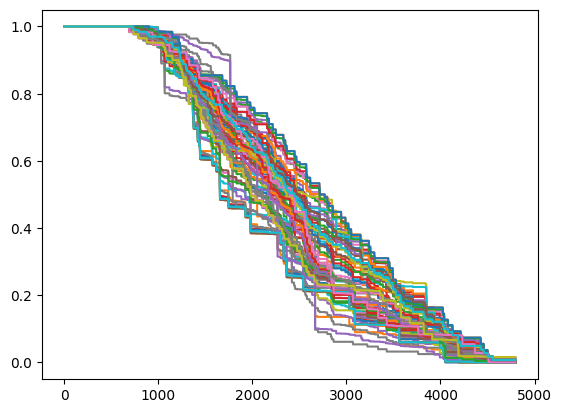

In [5]:
for i in range(80):
  plt.plot(avg_preds[i])

In [6]:
pstore = model.root_node.param_store.detach()

In [ ]:
X_train, T_train, E_train, X_test, T_test, E_test = data.pysurvival_split()

In [ ]:
import spyct

model = spyct.Model()
model.fit(X_train.values, y_train.numpy())

In [ ]:
preds_spyct = model.predict(y_test.numpy())

In [ ]:
roots_list = [tree[0].split_weights.to_ndarray()[0] for tree in model.trees]
roots_list = np.array(roots_list)
# [node.split_weights.to_ndarray() for node in nodes_list]

In [ ]:
plt.plot(roots_list.mean(axis=0))
plt.plot(pstore)

In [ ]:
model.trees[0]

In [ ]:
plt.plot(model.trees[0][0].split_weights.to_ndarray()[0])
plt.plot(pstore)

In [ ]:
pstore.shape, model.trees[0][0].split_weights.to_ndarray().shape

In [ ]:
for i in range(80):
  plt.plot(preds_spyct[i])

In [ ]:
bs = IPCWBrier(T_test, E_test)

In [ ]:
plt.plot(bs.evaluate(y_test, avg_preds))
plt.plot(bs.evaluate(y_test, preds_spyct))

In [ ]:
non_leaves = []

def traverse(node):
  if node is not None:
    if node.left is not None or node.right is not None: non_leaves.append(node)
    traverse(node.left)
    traverse(node.right)

traverse(model.root_node)

In [ ]:
weights = [node.split_model.weight.numpy() for node in non_leaves]
weights

In [ ]:
weights = np.array(weights)

In [ ]:
weights = weights.reshape(weights.shape[0], -1)

In [ ]:
for i in range(weights.shape[0]):
  plt.plot(weights[i])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

data_normalized = scaler.fit_transform(weights.T).T

In [ ]:
filtered_values_per_column = [data_normalized[i, :][data_normalized[i, :] > 0.9] for i in range(data_normalized.shape[0])]

In [ ]:
data_normalized.shape

In [ ]:
for node in non_leaves:
  print(node.num_instances)

In [ ]:
non_leaves[0].num_instances/model.num_training_instances*(data_normalized[0, :]/np.linalg.norm(data_normalized[0, :]))

In [ ]:
importances = torch.zeros((data_normalized.shape[1]))
for i, node in enumerate(non_leaves):
  importances += node.num_instances/model.num_training_instances*(data_normalized[i, :]/np.linalg.norm(data_normalized[i, :]))

In [ ]:
torch.topk(importances, k=10)

In [ ]:
dict(zip(X_train.columns[torch.topk(importances, k=10).indices.tolist()].tolist(), torch.topk(importances, k=10).values.tolist()))

# After implementation

In [105]:
model.feature_importances(k=10)

{738: 0.137959286570549,
 157: 0.13505646586418152,
 351: 0.13352590799331665,
 383: 0.13290515542030334,
 468: 0.1314186006784439,
 139: 0.13118121027946472,
 509: 0.13102541863918304,
 402: 0.13017357885837555,
 721: 0.12940764427185059,
 744: 0.12931495904922485}

In [106]:
model.feature_importances()

tensor([0.0903, 0.0890, 0.1104, 0.0968, 0.1143, 0.1084, 0.1196, 0.1140, 0.1050,
        0.1057, 0.1228, 0.1068, 0.0831, 0.1034, 0.1133, 0.1041, 0.1021, 0.1045,
        0.1124, 0.1132, 0.0997, 0.0949, 0.1063, 0.1092, 0.1115, 0.1089, 0.1151,
        0.1146, 0.1073, 0.1004, 0.1015, 0.0994, 0.1058, 0.1114, 0.1169, 0.1089,
        0.1022, 0.1136, 0.1140, 0.1177, 0.1118, 0.1053, 0.1055, 0.1112, 0.1110,
        0.0952, 0.0981, 0.1005, 0.1084, 0.1023, 0.0916, 0.1123, 0.1175, 0.1144,
        0.0996, 0.1036, 0.1057, 0.1131, 0.1082, 0.1036, 0.0780, 0.1226, 0.1090,
        0.0989, 0.1160, 0.1154, 0.1015, 0.1078, 0.1094, 0.1079, 0.1095, 0.1050,
        0.1032, 0.0944, 0.1057, 0.1156, 0.0947, 0.1049, 0.1075, 0.1030, 0.0968,
        0.1012, 0.1044, 0.0875, 0.1210, 0.1255, 0.1009, 0.1150, 0.1127, 0.0935,
        0.1174, 0.1052, 0.1163, 0.1090, 0.1045, 0.1221, 0.0990, 0.1075, 0.1049,
        0.1173, 0.1110, 0.1106, 0.1018, 0.1079, 0.1033, 0.0843, 0.1188, 0.1010,
        0.1044, 0.1085, 0.1086, 0.1029, 

### Interpretability

- Fit UMAP on the whole dataset
- Visualize the embeddings in 2D
- For each prediction: take the path of each sample of SVI and calculate distribution of the taken paths
- For each path, take the top 5 most important features of each node starting from the root and going towards the leaf
- Form a flow chart based on the paths. The flow chart should go from left to right
- Each block in the flow chart should be alligned with a particular node from the path
- A block contains the features and their values which together constitute a sub-rule
- The path (sub-rules followed by each other in a sequential order) forms a rule

In [15]:
nodes = []
model.get_nodes(model.root_node, nodes)

In [16]:
edges = model.create_edge_list(model.root_node)

In [17]:
import networkx as nx

G = nx.DiGraph()
G.add_edges_from(edges)

In [18]:
import matplotlib.pyplot as plt
import random

    
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    '''
    From Joel's answer at https://stackoverflow.com/a/29597209/2966723.  
    Licensed under Creative Commons Attribution-Share Alike 
    
    If the graph is a tree this will return the positions to plot this in a 
    hierarchical layout.
    
    G: the graph (must be a tree)
    
    root: the root node of current branch 
    - if the tree is directed and this is not given, 
      the root will be found and used
    - if the tree is directed and this is given, then 
      the positions will be just for the descendants of this node.
    - if the tree is undirected and not given, 
      then a random choice will be used.
    
    width: horizontal space allocated for this branch - avoids overlap with other branches
    
    vert_gap: gap between levels of hierarchy
    
    vert_loc: vertical location of root
    
    xcenter: horizontal location of root
    '''
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''
    
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = width*.5, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos

            
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

In [19]:
pos = hierarchy_pos(G,model.root_node, width=5., vert_gap = 5.)

In [20]:
leaves = []
model.get_leaves(model.root_node, leaves)
leaves

In [22]:
non_leaves = [x for x in nodes if x not in leaves]
non_leaves

In [24]:
len(nodes) == len(leaves) + len(non_leaves)

True

In [33]:
weights_per_node = {}
for node in non_leaves:
    weights_per_node[node] = node.split_model.weight[0]

In [37]:
list(weights_per_node.keys())

In [93]:
weights_top5 = {}
for key, value in weights_per_node.items():
    abs_values = np.abs(value.numpy())
    sorted_indices = np.argsort(abs_values)[::-1][:5]
    sorted_values = abs_values[sorted_indices]
    sorted_dict = {idx: val for idx, val in zip(sorted_indices, sorted_values)}
    weights_top5[key] = sorted_dict
    result_string = ''
    for k,v in sorted_dict.items(): result_string+=f"{k}: {v}\n"
    weights_top5[key] = result_string

In [94]:
for k,v in weights_top5.items():
  print(weights_top5[k])
  break

399: 3.0513534545898438
683: 2.858264684677124
440: 2.8480002880096436
293: 2.726674795150757
709: 2.710261106491089



In [95]:
prototype_expected_value = {node: round(torch.sum(node.prototype).item(), 2) for node in leaves}

In [96]:
prototype_expected_value

{<src.models.node.VNode at 0x29cfd5700>: 1669.88,
 <src.models.node.VNode at 0x29cfd5f70>: 2187.0,
 <src.models.node.VNode at 0x29cfa8a90>: 2396.87,
 <src.models.node.VNode at 0x29cfd58e0>: 2027.61,
 <src.models.node.VNode at 0x29cfa8910>: 2446.49,
 <src.models.node.VNode at 0x29cfa8d90>: 2489.78,
 <src.models.node.VNode at 0x2973c2790>: 2778.8,
 <src.models.node.VNode at 0x29cfa8be0>: 2219.39}

In [103]:
non_leaf_sizes = [80 * len(label) for label in list(weights_top5.values())]
leaf_sizes = [label for label in list(prototype_expected_value.values())]

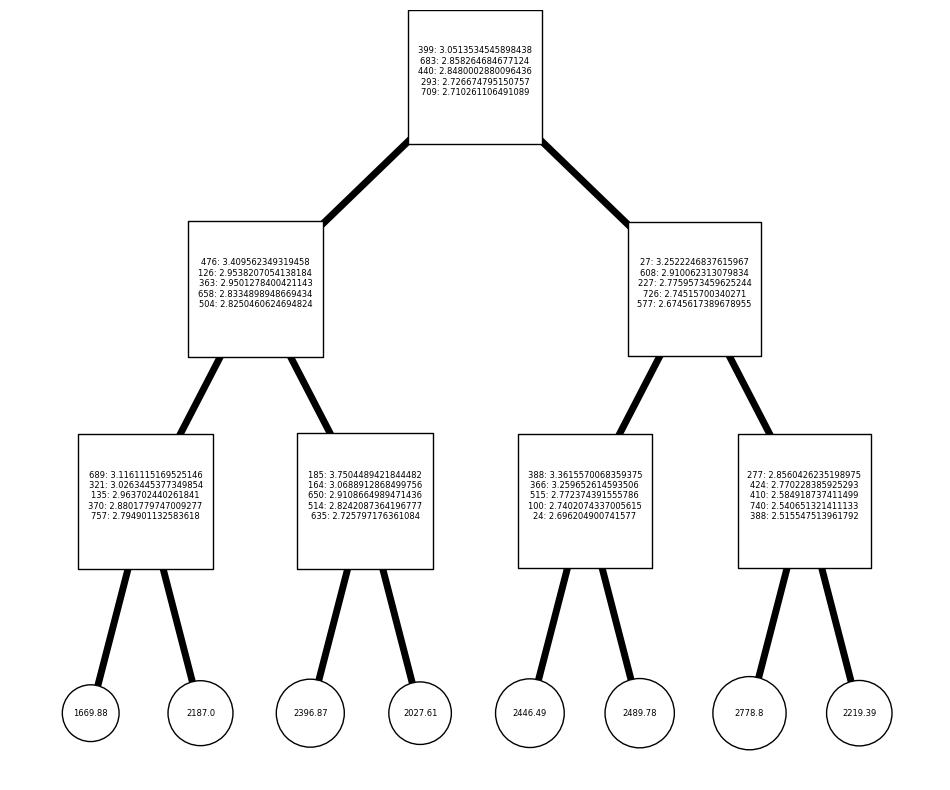

In [104]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(1, 1, 1)
nx.draw(G, ax =ax  , pos=pos, 
        with_labels=False, node_size=1,arrowstyle='-', 
        width=5)#,edge_color = skew_edge_colors,)
nx.draw_networkx_nodes(G, pos=pos,ax=ax, node_size=non_leaf_sizes, nodelist=non_leaves, node_color='w', edgecolors='black', alpha = 1, node_shape='s')
nx.draw_networkx_labels(G, pos=pos,ax=ax, labels=weights_top5, font_size=6);
nx.draw_networkx_nodes(G, pos=pos,ax=ax, node_size = leaf_sizes, nodelist=leaves, node_color='w', edgecolors='black', alpha = 1)
nx.draw_networkx_labels(G, pos=pos,ax=ax, labels=prototype_expected_value, font_size=6);